# Basic Information
* title: "Deduplication of contact information"
* author: "Kent Shih"
* date: "14 10, 2019"

# Data exploration
* Some missing value 
* ??_equality is same as ??, so we remove those columns
* the number of postive data and negatvie data are both balance
* the values of columns have been standarization ? 
* the number of data is sufficent to build a hight complexity model such as deep learning


In [1]:
EVA_SIZE = 2500

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# read from row data and do suffle 
data_df = pd.read_csv("./address_matching_data.csv").sample(frac=1,random_state=1)
data_df[-10:]

,id,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,...,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality,is_match
20609,2465#2478,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.454545,0.5,1,...,?,?,?,?,1.0,1.0,m,m,s,1
144,702#703,0.545455,0.545455,0.377778,0.409091,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
21440,2097#2064,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,1.0,1.0,?,?,0.75,0.428571432829,s,m,n,1
19279,8258#8263,0.080808,0.011111,0.088235,0.021739,?,?,?,?,?,...,?,?,?,?,?,?,m,m,n,-1
7813,6549#6550,0.222857,0.000000,0.153846,0.000000,1,1,1,1,?,...,1.0,1.0,?,?,?,?,s,m,n,1
10955,2177#2183,1.000000,1.000000,1.000000,1.000000,1,1,1,1,?,...,1.0,1.0,?,?,1.0,1.0,s,m,s,1
17289,2260#2257,0.977273,0.910714,0.954545,0.800000,?,?,?,?,?,...,1.0,1.0,?,?,1.0,1.0,s,m,s,1
5192,1177#1184,0.693452,0.566667,0.695652,0.592593,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
12172,137#138,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,1.0,1.0,?,?,0.5,0.285714298487,s,m,n,1
235,8175#8181,0.183838,0.033333,0.117647,0.030303,?,?,?,?,?,...,?,?,?,?,0.5,0.25,m,m,n,-1


In [4]:
test_df = pd.read_csv("./address_matching_test.csv")
test_df.head()

,id,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,...,website_trigram_term,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality
0,7221#7218,0.703704,0.666667,0.680000,0.533333,1,1,1,1,1,...,?,1.0,1.0,?,?,1.0,1.0,s,m,s
1,2393#2398,1.000000,1.000000,0.520000,1.000000,0.666667,0.666667,0.454545,0.5,1,...,?,?,?,?,?,1.0,1.0,m,m,s
2,2509#2510,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,?,1.0,1.0,?,?,?,?,s,m,n
3,3695#3700,0.111310,0.000000,0.095238,0.000000,1,1,1,1,0.8,...,?,?,?,?,?,?,?,m,m,n
4,15918#15955,0.175000,0.074074,0.153846,0.095238,1,1,1,1,1,...,?,?,?,?,?,?,?,m,m,n


In [5]:
# 超過一半是 Match 的
data_df.describe()

,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,is_match
count,28235.000000,28235.000000,28235.000000,28235.000000,28235.00000
mean,0.628171,0.563277,0.537006,0.509530,0.43524
std,0.304767,0.369004,0.324820,0.372265,0.90033
min,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,0.363387,0.222222,0.243243,0.142857,-1.00000
50%,0.666667,0.666667,0.476190,0.483871,1.00000
75%,1.000000,1.000000,0.875000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000


In [9]:
for c in data_df.columns:
    if 'equality' in c : 
#         print("del",c)
        del data_df[c]

In [10]:
new_data_df = data_df.replace("?",-1)

# for c in new_data_df.columns:
#     print(c,str(sum(new_data_df[c]=='?')/28235)[:4])

# Modeling approach
* becasue we have a lot of labeled data so we could try to use a heavy model , such as deep learning
* but overfitting issue , we just use 3 layer and add dropout layer between each hidden layer
* the performnace is prety good

In [11]:

import keras
# from keras import backend as K
# from keras.models import Sequential
# from keras.layers import Activation
# from keras.layers.core import Dense,Dropout
# from keras.optimizers import Adam
# # from keras.metrics import categorical_crossentropy
# from keras.losses import categorical_crossentropy

Using TensorFlow backend.


In [12]:
id_list = new_data_df['id'].tolist()
del new_data_df['id']
match_list = new_data_df['is_match'].tolist()
del new_data_df['is_match']


In [13]:
new_match_list = []
for v in  match_list:
    if v == 1 : new_match_list.append(1)
    else: new_match_list.append(0)

In [14]:
raw_data = new_data_df.to_numpy()

In [15]:
raw_data.shape

(28235, 26)

## model graph

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

## data preparation

In [17]:
y_train=keras.utils.to_categorical(new_match_list[:-EVA_SIZE])


In [18]:
X_train = raw_data[:-EVA_SIZE]

In [19]:
## train logistic regression
tree_model.fit(X_train,y_train[:,1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Performance analysis
* roc_auc is 0.977
* use "grid search" to find the optimization threshhold
* the best threshold is 0.53


In [20]:
X_eva = raw_data[-EVA_SIZE:]
y_eva=keras.utils.to_categorical(new_match_list[-EVA_SIZE:])


In [21]:
from sklearn.metrics import precision_score,f1_score

In [22]:
result_prb = tree_model.predict_proba(X_eva)
predict_classes = tree_model.predict(X_eva)

In [23]:
precision_score(new_match_list[-EVA_SIZE:],predict_classes)

0.952922077922078

In [24]:
f1_score(new_match_list[-EVA_SIZE:],predict_classes)

0.962558075977043

In [25]:
## confusion mattix
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(new_match_list[-EVA_SIZE:],predict_classes).ravel()

In [26]:
(tn, fp, fn, tp)

(602, 87, 50, 1761)

In [27]:
tpr = tp/sum(new_match_list[-EVA_SIZE:])
tnr = tn/sum(i==0 for i in new_match_list[-EVA_SIZE:])
print(tpr,tnr)

0.9723909442297074 0.8737300435413643


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [28]:
def TPR(x,y):
    total = sum([v==1 for v in x ])
    tp_count = 0
    for i,v in enumerate(y) :
        if v == 1 and x[i] == 1:
            tp_count = tp_count + 1
    return tp_count/total

In [29]:
def TNR(x,y):
    total = sum([v==0 for v in x ])
    tp_count = 0
    for i,v in enumerate(y) :
        if v == 0 and x[i] == 0:
            tp_count = tp_count + 1
    return tp_count/total

In [30]:
def PRE(x,y):
    total = len(x)
    tp_count = 0
    for i,v in enumerate(y) :
        if v == x[i]:
            tp_count = tp_count + 1
    return tp_count/total

In [31]:
print("PRE",PRE(new_match_list[-EVA_SIZE:],predict_classes))
print("TPR",TPR(new_match_list[-EVA_SIZE:],predict_classes))
print("TNR",TNR(new_match_list[-EVA_SIZE:],predict_classes))

PRE 0.9452
TPR 0.9723909442297074
TNR 0.8737300435413643


In [32]:
# Use Grid Search
max_score = -1
score_list = []
for th in np.arange(0.01,1,0.01):
    predict_classes_with_th  = (result_prb[:,1]>th).astype('int')
    print("positive",predict_classes_with_th.sum())
    score = TPR(
        new_match_list[-EVA_SIZE:],predict_classes_with_th) + TNR(
        new_match_list[-EVA_SIZE:],predict_classes_with_th)*3

    print("Score:",score, 
          "TPR:",TPR(new_match_list[-EVA_SIZE:],predict_classes_with_th),
          "TNR:",TNR(new_match_list[-EVA_SIZE:],predict_classes_with_th))
    if score >= max_score : 
        max_score = score
    
    else :
        break
        
    score_list.append(score)
best_th = th - 0.01
# So the threshold is ? , for TPR + TNR*3
print("for best threshold is " , th - 0.01)

positive 1852
Score: 3.581070846680382 TPR: 0.9729431253451132 TNR: 0.8693759071117562
positive 1852
Score: 3.581070846680382 TPR: 0.9729431253451132 TNR: 0.8693759071117562
positive 1852
Score: 3.581070846680382 TPR: 0.9729431253451132 TNR: 0.8693759071117562
positive 1852
Score: 3.581070846680382 TPR: 0.9729431253451132 TNR: 0.8693759071117562
positive 1852
Score: 3.581070846680382 TPR: 0.9729431253451132 TNR: 0.8693759071117562
positive 1852
Score: 3.581070846680382 TPR: 0.9729431253451132 TNR: 0.8693759071117562
positive 1852
Score: 3.581070846680382 TPR: 0.9729431253451132 TNR: 0.8693759071117562
positive 1852
Score: 3.581070846680382 TPR: 0.9729431253451132 TNR: 0.8693759071117562
positive 1852
Score: 3.581070846680382 TPR: 0.9729431253451132 TNR: 0.8693759071117562
positive 1852
Score: 3.581070846680382 TPR: 0.9729431253451132 TNR: 0.8693759071117562
positive 1852
Score: 3.581070846680382 TPR: 0.9729431253451132 TNR: 0.8693759071117562
positive 1852
Score: 3.581070846680382 TPR:

In [56]:
from sklearn.metrics import roc_curve,roc_auc_score
## ROC Cuve , I think the normal case , usually is "F1Score"
fpr, tpr, thresholds = roc_curve(new_match_list[-EVA_SIZE:], result_prb[:,1])


In [57]:
# and see roc cuve area 

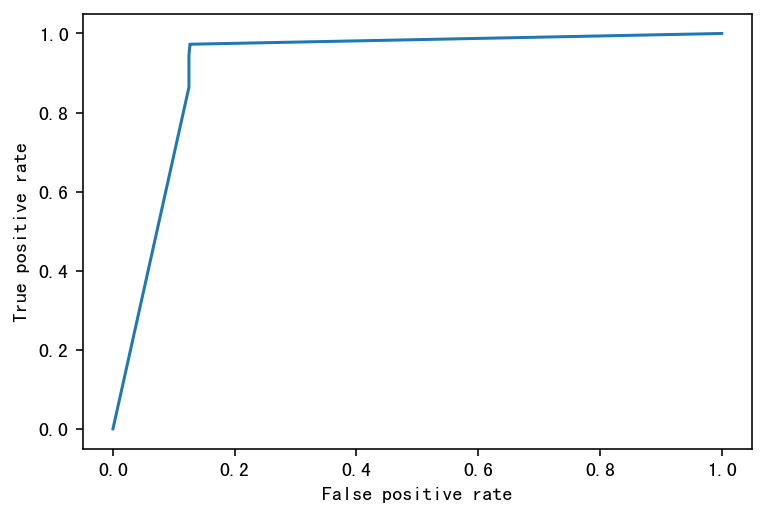

In [61]:

plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


## ROC_AUC score is a good metric to measure the peformance

In [62]:
roc_auc_score(new_match_list[-EVA_SIZE:], result_prb[:,1])

0.9171708291291968

In [60]:
## export tree graph
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data)


In [38]:
graph.render('test-output/holy-grenade.gv', view=True)  

'test-output/holy-grenade.gv.pdf'

# DO testing

In [39]:
test_df = pd.read_csv("./address_matching_test.csv")
test_df.describe()

,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term
count,6230.000000,6230.000000,6230.000000,6230.000000
mean,0.617670,0.550384,0.521490,0.493838
std,0.309591,0.372656,0.329626,0.375572
min,0.000000,0.000000,0.000000,0.000000
25%,0.342857,0.172577,0.225806,0.120000
50%,0.666667,0.591837,0.448276,0.450806
75%,1.000000,1.000000,0.865116,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [40]:
# miss value rate
for c in test_df.columns:
    print(c,str(sum(test_df[c]=='?')/6230)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.64
city_trigram_simple 0.64
city_levenshtein_term 0.64
city_trigram_term 0.64
zip_levenshtein_simple 0.73
zip_trigram_simple 0.73
zip_levenshtein_term 0.73
zip_trigram_term 0.73
street_levenshtein_simple 0.71
street_trigram_simple 0.71
street_levenshtein_term 0.71
street_trigram_term 0.71
website_levenshtein_simple 0.94
website_trigram_simple 0.94
website_levenshtein_term 0.94
website_trigram_term 0.94
phone_levenshtein 0.59
phone_trigram 0.59
fax_levenshtein 0.97
fax_trigram 0.97
street_number_levenshtein 0.34
street_number_trigram 0.34
phone_equality 0.0
fax_equality 0.0
street_number_equality 0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [41]:
for c in test_df.columns:
    if 'equality' in c : 
        print("del",c)
        del test_df[c]

del phone_equality
del fax_equality
del street_number_equality


In [42]:
new_test_df = test_df.replace("?",-1)
for c in new_test_df.columns:
    print(c,str(sum(new_test_df[c]=='?')/6230)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.0
city_trigram_simple 0.0
city_levenshtein_term 0.0
city_trigram_term 0.0
zip_levenshtein_simple 0.0
zip_trigram_simple 0.0
zip_levenshtein_term 0.0
zip_trigram_term 0.0
street_levenshtein_simple 0.0
street_trigram_simple 0.0
street_levenshtein_term 0.0
street_trigram_term 0.0
website_levenshtein_simple 0.0
website_trigram_simple 0.0
website_levenshtein_term 0.0
website_trigram_term 0.0
phone_levenshtein 0.0
phone_trigram 0.0
fax_levenshtein 0.0
fax_trigram 0.0
street_number_levenshtein 0.0
street_number_trigram 0.0


In [43]:
# keep id list and remove it from test_df
id_test_list = new_test_df['id'].tolist()
del new_test_df['id']

In [44]:
raw_test_data = new_test_df.to_numpy()
X_test = raw_test_data

In [47]:
# use model to predict the testing data
test_result = tree_model.predict(X_test)

In [48]:
resut_df =  pd.DataFrame(test_result)

In [49]:
resut_df.describe()

,0
count,6230.000000
mean,0.705297
std,0.455946
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [53]:
# testing data , predict result is as below
answer = list( zip(id_test_list,(test_result>best_th).astype(int).tolist()))

In [54]:
pd.DataFrame(answer).describe()

,1
count,6230.000000
mean,0.705297
std,0.455946
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# Conclusion 
* decsion tree performance is bad than baseline
* False positive rate is higer than baseline that will bother operator 
